<h1 style="color:PaleVioletRed"> Bike Rental</h1>

The dataset provided contains detailed information on bike rentals, environmental conditions, and seasonal settings. It includes attributes such as temperature, humidity, wind speed, weather conditions, date, day of the week, and time of the day. The target variable is the count of bikes rented per day. By leveraging this dataset, we can analyze the relationships between bike rental demand and environmental factors, enabling us to make data-driven decisions for optimizing the bike sharing system's operations.

<h1 style="color:PaleVioletRed">Business Case:</h1>

Accurate prediction of daily bike rental count based on environmental and seasonal factors is crucial for optimizing bike sharing system operations. By developing a predictive model, we can improve resource allocation, enhance inventory management, and ensure a seamless user experience.

<h1 style="color:PaleVioletRed">Problem Statement:</h1>

This project aims to develop a predictive model that estimates the daily bike rental count using environmental and seasonal variables. By analyzing a comprehensive dataset, including temperature, humidity, wind speed, weather conditions, date, and time, we seek to uncover patterns and dependencies to accurately forecast bike rental demand.




<h1 style="color:PaleVioletRed"> Reading the data</h1>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# setting maximum number of columns to be displayed
pd.set_option('display.max_columns',None)



In [3]:
df1=pd.read_csv("day.csv")

In [4]:
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
# Load the dataset
df2 = pd.read_csv('hour.csv')
df2

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


<b>after loading `day.csv` and `hour.csv` file we can see that both the file have same feature .hour csv has record of every hour and day has record of combination 24 hours.so to reduce computation i would like to go with day csv file</b>

<h1 style="color:PaleVioletRed"> Basic Checks</h1>

In [6]:
# previewing the first five rows
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# previewing the last five rows
df1.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [8]:
# previewing number of rows and columns
df1.shape

(731, 16)

In [9]:
#To check  data type and  null value of all columns 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
# checking for missing values
missing = df1.isna().sum().to_frame()
missing

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


<b> There is no null value present in our data</b>

In [11]:
# previewing summary statistics of columns
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
# Checking for the presence of unique values to categorize the data variables into numeric and categorical variables
df1.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [13]:
df1['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
df1['yr'].unique()


array([0, 1], dtype=int64)

In [15]:
df1['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [16]:
df1['holiday'].unique()

array([0, 1], dtype=int64)

In [17]:
df1['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [18]:
df1['workingday'].unique()

array([0, 1], dtype=int64)

In [19]:
df1['weathersit'].unique()


array([2, 1, 3], dtype=int64)

<b>From the above exploration of data variables, it can be clearly understood that the data variables `season`,`yr`,`mnth`,`holiday`,`weekday`,`workingday` and `weathersit` are actually categorical data values.</b>

<h1 style="color:PaleVioletRed">  Data Description</h1>

The bike rental dataset contains `732 rows` and `16 columns`. Each row represents a different observation, and each column provides specific information about the bike rentals. Here's a summary of the columns in the dataset:




|No.| Column    | Description|
|---| ---       | ---         |
|1| `Instant` | A unique identifier or index for each row/observation.|
|2|`dteday`| The date of the observation in YYYY-MM-DD format|
|3|`season`| The season of the year (1: spring, 2: summer, 3: fall, 4: winter)|
|4|`yr`| The year (0: 2011, 1: 2012)|
|5|`mnth`| The month of the year (1 to 12)|
|6|`holiday`| Indicates if it is a holiday (0: non-holiday, 1: holiday)|
|7|`weekday`| The day of the week (0: Sunday, 1: Monday, ..., 6: Saturday)|
|8|`workingday`| Indicates if it is a working day (0: non-working day, 1: working day)|
|9|`weathersit`| The weather situation (1: clear, 2: misty/cloudy, 3: light rain/snow, 4: heavy rain/snow)|
|10|`temp`|The temperature in Celsius.|
|11|`atemp`| The adjusted temperature (feeling temperature) in Celsius|
|12|`hum`| The humidity.|
|13|`windspeed`| The wind speed |
|14|`casual`| The count of casual (non-registered) bike rentals|
|15|`registered`|The count of registered bike rentals.|
|16|`cnt`| The total count of bike rentals (casual + registered)|
  
  
  
 

<h1 style="color:PaleVioletRed">  Exploratory Data Analysis</h1>

In [20]:
# Convert 'dteday' column to datetime format and set it as the index
df1['dteday'] = pd.to_datetime(df1['dteday'])
df1.set_index('dteday', inplace=True)

In [21]:
df1.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


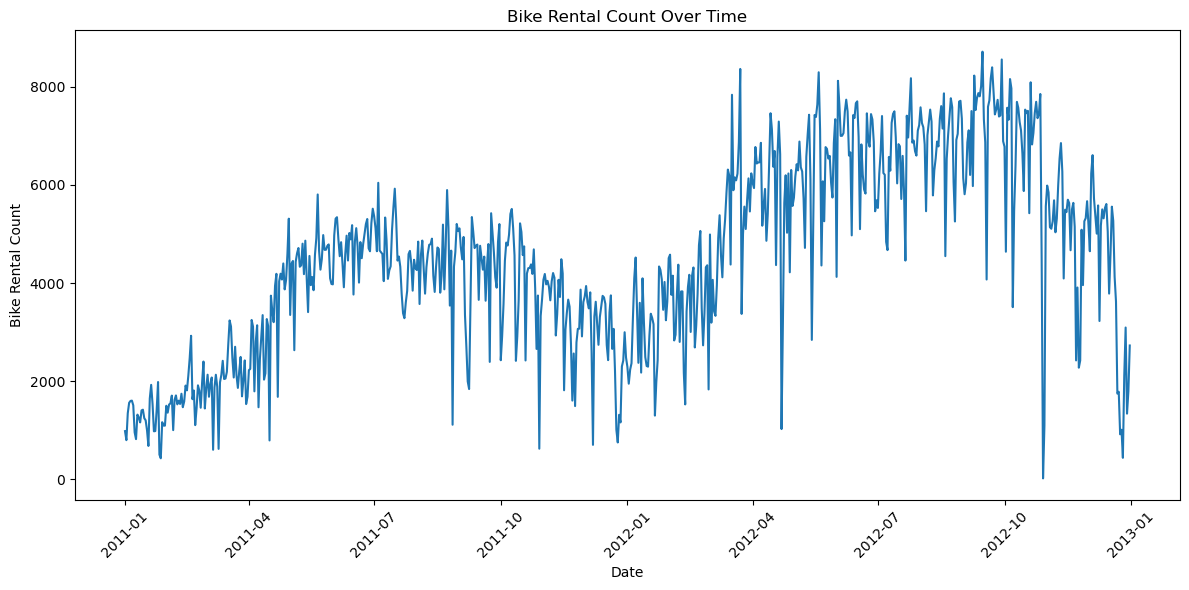

In [22]:
# Plot the trend of bike rental count over time
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['cnt'])
plt.xlabel('Date')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rental Count Over Time')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the spacing of the plot
plt.show()

<h1 style="color:PaleVioletRed">  Data Insights</h1>

 * From April to October 2012, the bike rental count exhibited a significant increase, with counts ranging between 6000 and 8000. This indicates a strong demand for bike rentals during this period.
  * In contrast, the bike rental count during the same period from April to October 2011 was relatively lower, suggesting a lower demand for rentals compared to 2012.
  * The noticeable growth in bike rental demand from April to October 2012 indicates a positive growth trend in the rental business, reflecting an improved market performance compared to the previous year.

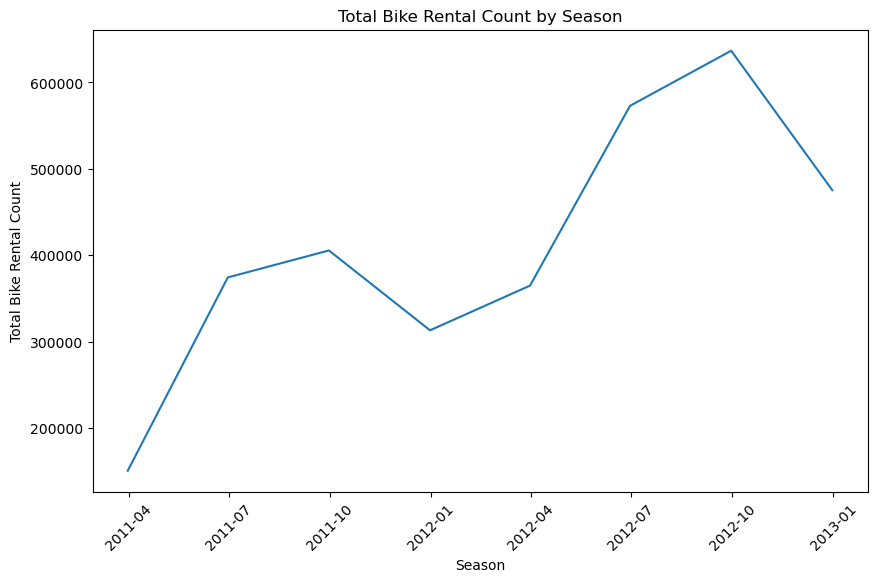

In [23]:
# Resample the data to a lower frequency (e.g., seasonal) and plot the aggregated bike rental count
seasonal_data = df1['cnt'].resample('Q').sum()  # Resample to quarterly season
plt.figure(figsize=(10, 6))
plt.plot(seasonal_data.index, seasonal_data)
plt.xlabel('Season')
plt.ylabel('Total Bike Rental Count')
plt.title('Total Bike Rental Count by Season')
plt.xticks(rotation=45)
plt.show()


<h1 style="color:PaleVioletRed">  Data Insights</h1>


* The bike rental count shows a clear seasonal pattern, with a noticeable growth in rental demand during the peak season from April to October.
* During the peak season, particularly in October, the bike rental count reaches its highest point, exceeding 600,000. This indicates a substantial demand for bike rentals during this period.
* The trend observed from April to October 2011 repeats in the corresponding period of April to October 2012. This suggests a positive correlation.

In [24]:
# Find the date and season with the highest bike rental count
max_count_index = df1['cnt'].idxmax()
max_count_date = max_count_index.date()
max_count_season = df1.loc[max_count_index, 'season']
highest_count = df1.loc[max_count_index, 'cnt']

print("The highest bike rental count of", highest_count, "occurred on", max_count_date, "in the", max_count_season, "season.")


The highest bike rental count of 8714 occurred on 2012-09-15 in the 3 season.


* The highest bike rental count recorded in the dataset is 8714. This peak count was observed on September 15, 2012, during the fall season (season 3). 

In [25]:
# Calculate the range of the 'cnt' values
min_count = df1['cnt'].min()
max_count = df1['cnt'].max()
print("The range of the bike rental count is", min_count, "to", max_count)




The range of the bike rental count is 22 to 8714


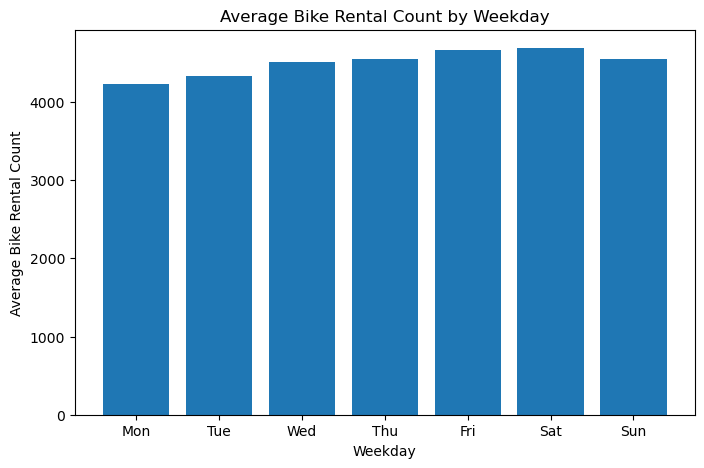

In [26]:
weekday_data = df1.groupby('weekday')['cnt'].mean()  # Calculate average bike rental count by weekday
plt.figure(figsize=(8, 5))
plt.bar(weekday_data.index, weekday_data)
plt.xlabel('Weekday')
plt.ylabel('Average Bike Rental Count')
plt.title('Average Bike Rental Count by Weekday')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


<h1 style="color:PaleVioletRed">  Data Insights</h1>

* Bike rentals are consistently high on weekdays, with an average count exceeding 4000. This suggests that people use bikes frequently for activities like commuting or running errands during the weekdays.

* On Fridays and Saturdays, there is a slight increase in bike rentals compared to other weekdays. 

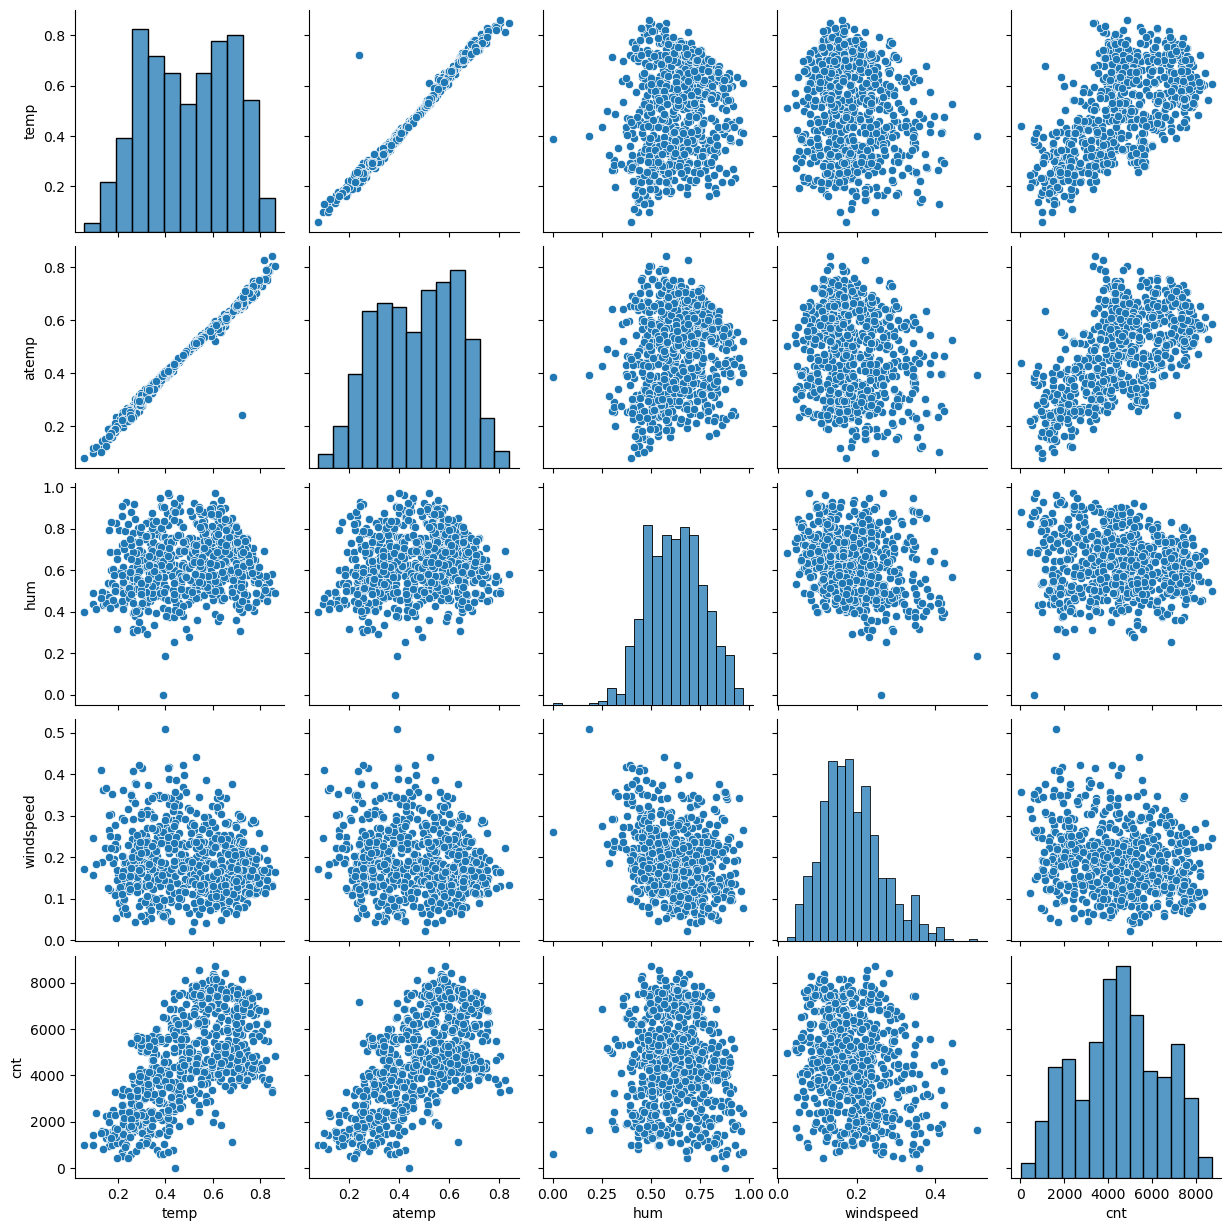

In [27]:
#PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

sns.pairplot(df1, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

* <b> from above graphs we can say that temp and atemp have a relationship</b>

atemp Skewness :  -0.13081889807374117
atemp Kurtosis :  -0.9866019052943136
temp Skewness :  -0.05440902480571621
temp Kurtosis :  -1.1194225488473057


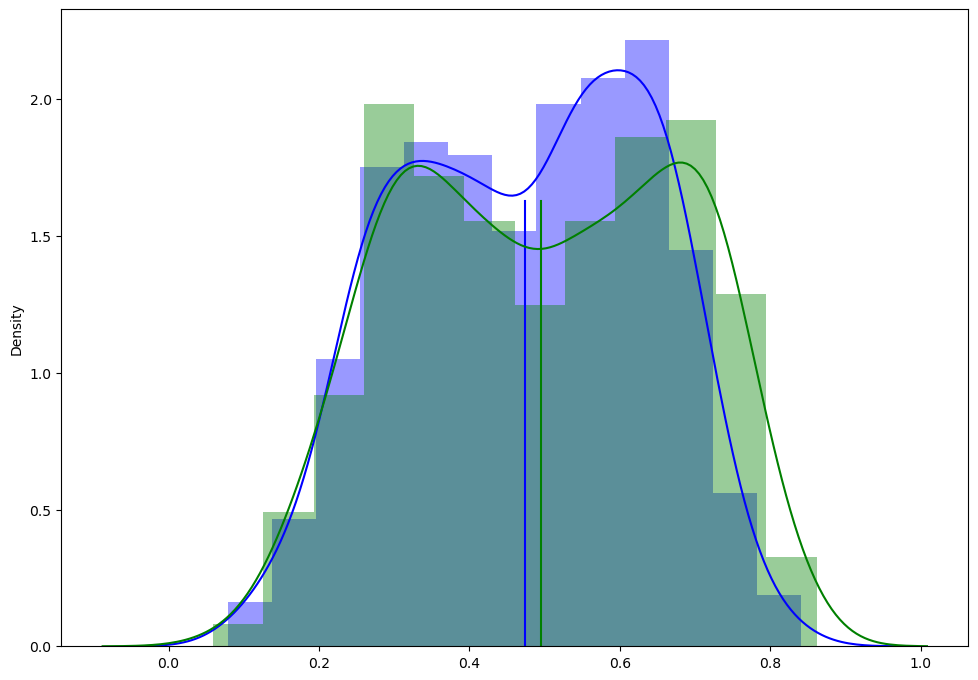

In [28]:

from scipy.stats import kurtosis, skew
#Distribution of Variable 'atemp','temp'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.axvline(df1['atemp'].mean(), 0,0.7, color = 'b')
plt.axvline(df1['temp'].mean(), 0,0.7, color = 'g')

sns.distplot(df1['atemp'], axlabel = False, color = 'b')
ax = sns.distplot(df1['temp'], axlabel = False, color = 'g')

print('atemp Skewness : ', skew(df1['atemp']))
print('atemp Kurtosis : ', kurtosis(df1['atemp']))

print('temp Skewness : ', skew(df1['temp']))
print('temp Kurtosis : ', kurtosis(df1['temp']))

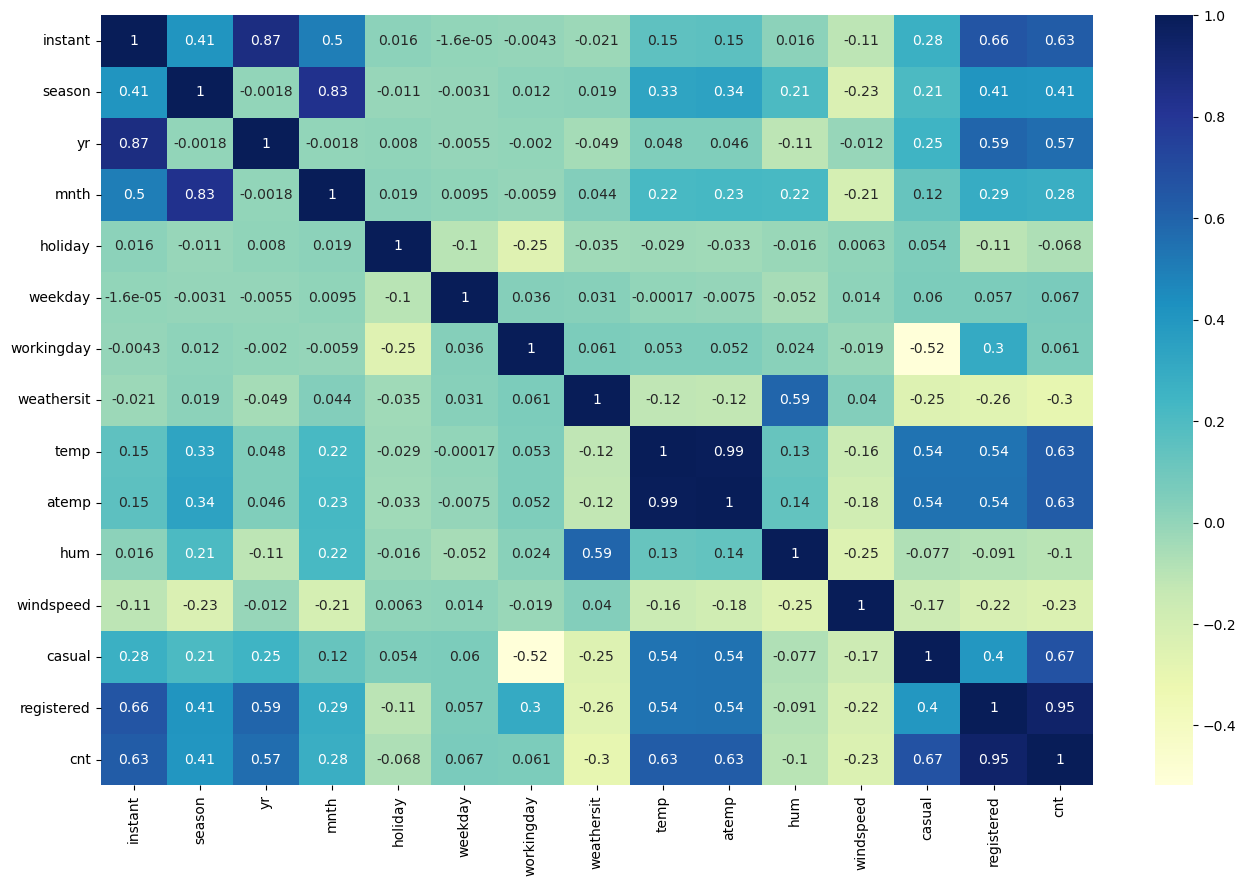

In [29]:
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")
plt.show()

* <b>A correlation of 0.99 between temp and atemp indicates a strong positive linear relationship that is very close to 1.</b>

<h1 style="color:PaleVioletRed"> Data Preprocessing</h1>

In [30]:
#Checking for the presence of missing values
df1.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b>From the above result, it is clear that the dataset contains NO Missing Values.</b>

<h1 style="color:PaleVioletRed"> dropping columns</h1>

In [31]:
#Let us drop temp and consider atemp

df1.drop(['temp','instant','casual','registered'],axis=1,inplace=True)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600


<b>we know that `casual`+`registered`=`cnt` and `cnt` is our target variable so we will not consider casual and registered</b>


<h1 style="color:PaleVioletRed"> Handling Outliers</h1>


Outliers in the data values exists only in continuous/numeric form of data variables. Thus, we need to store all the numeric and categorical independent variables into a separate array structure.


In [32]:
numeric_col = ['atemp','hum','windspeed']
categorical_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']

In [33]:
numeric_col

['atemp', 'hum', 'windspeed']

Using BoxPlot to detect the presence of outliers in the numeric/continuous data columns.


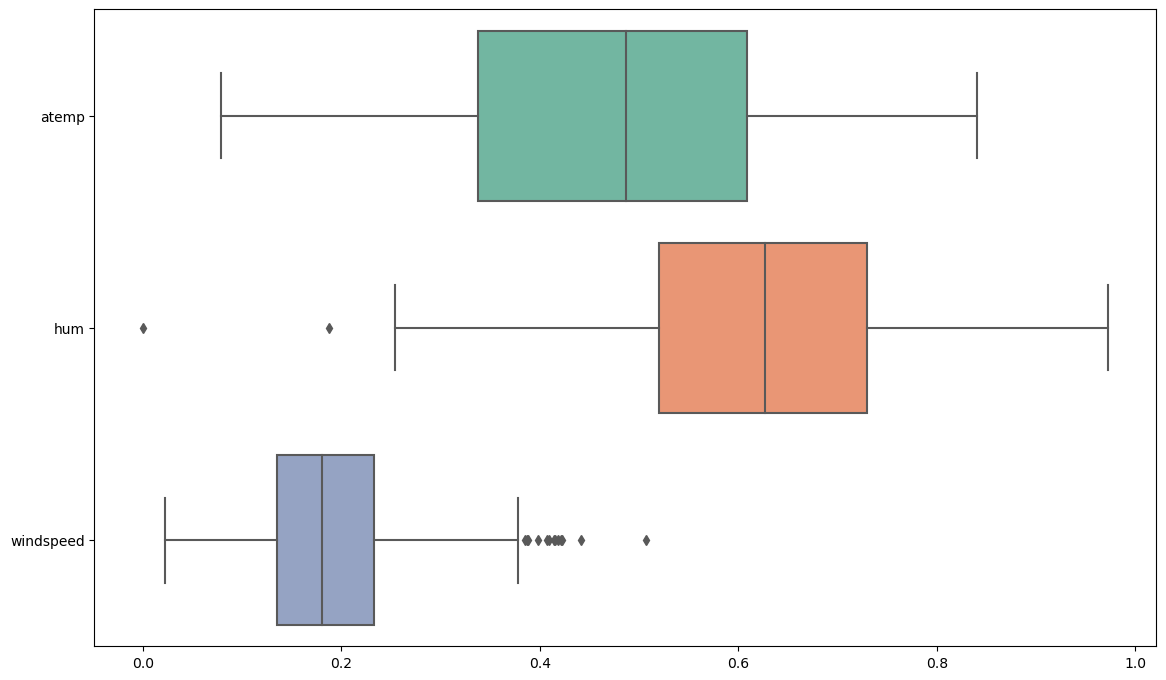

In [34]:
#Outlier Analysis for all numeric variables present in the data
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
ax = sns.boxplot(data=df1.iloc[:,7:10], orient="h", palette="Set2")

#Observation : There are outliers present in the 'hum' and 'windspeed' variable and hence we need to treat them.

<b>From the above visualization, it is clear that the data variables 'hum' and 'windspeed' contains outliers in the data values.</b>

In [35]:
# Columns to Check for outliers
cnames = ['hum','windspeed','atemp']

for i in cnames:
    q75, q25 = np.percentile(df1.loc[:,i], [75,25])
    
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    df1.loc[df1.loc[:,i] < min ,:i ] = np.nan
    df1.loc[df1.loc[:,i] > max ,:i ] = np.nan
    


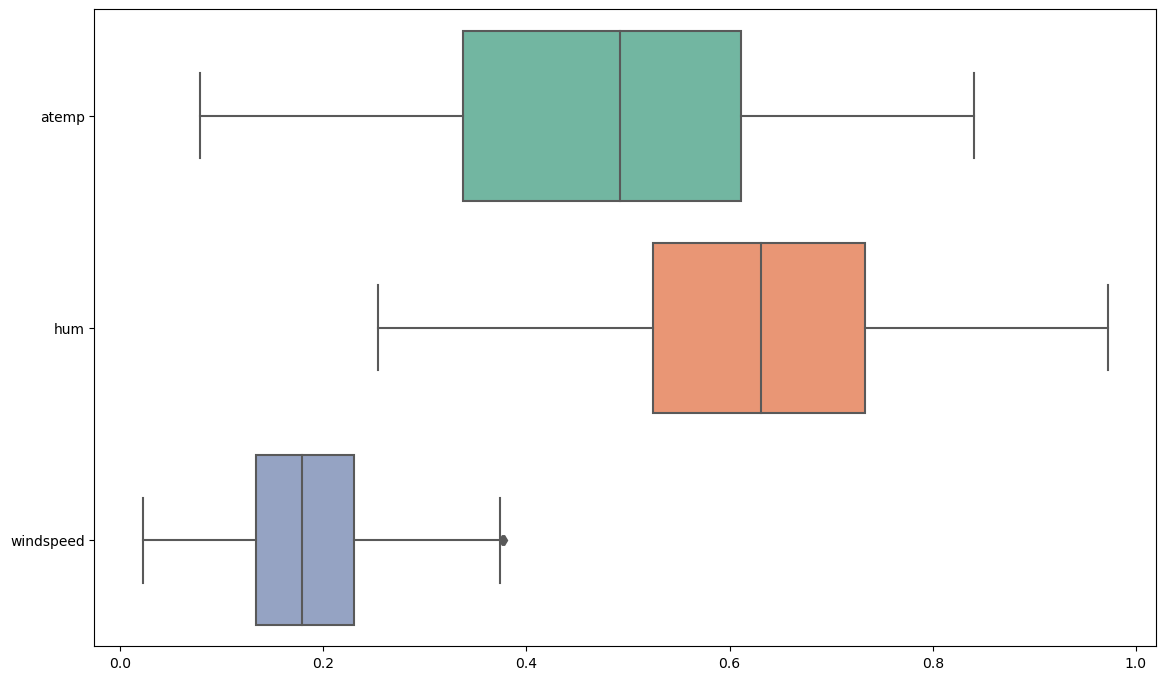

In [36]:
#Outlier Analysis for all numeric variables present in the data
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
ax = sns.boxplot(data=df1.iloc[:,7:10], orient="h", palette="Set2")

#Observation : All the Outliers are removed.


<h1 style="color:PaleVioletRed">DATA VISUALIZATION -- Numeric variables of the dataset</h1>

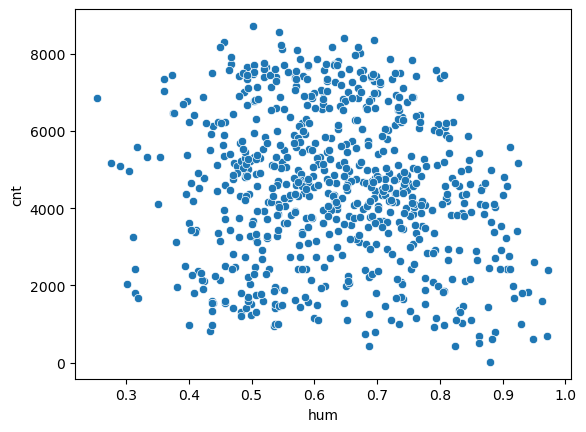

In [37]:
# Add this line to display the plot
sns.scatterplot(x=df1['hum'], y=df1['cnt'])
plt.show()  


<Axes: xlabel='windspeed', ylabel='cnt'>

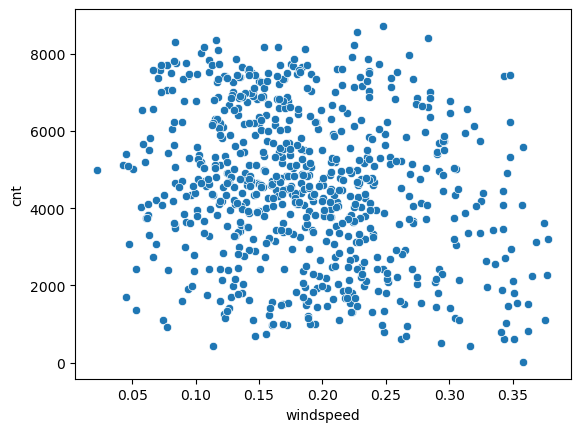

In [38]:

sns.scatterplot(x=df1['windspeed'],y=df1['cnt'])

<Axes: xlabel='atemp', ylabel='cnt'>

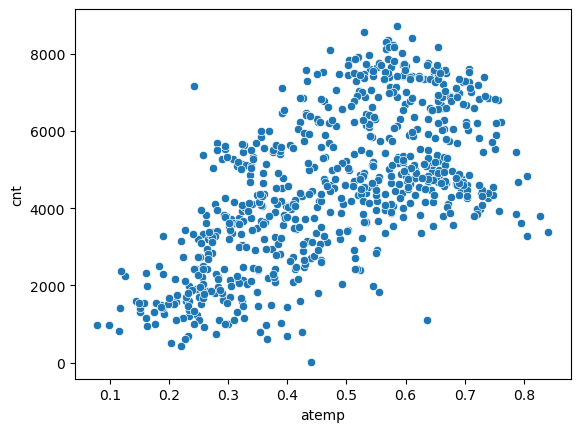

In [39]:
sns.scatterplot(x=df1['atemp'],y=df1['cnt'])


From the above data visualization, it is clear that the data is free from outliers.

<h1 style="color:PaleVioletRed">DATA VISUALIZATION -- Categorical Variables of the dataset</h1>

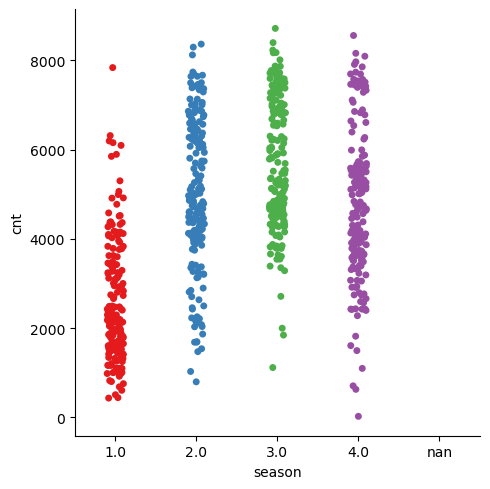

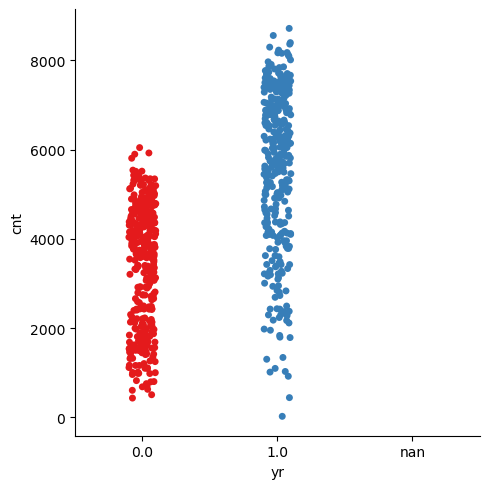

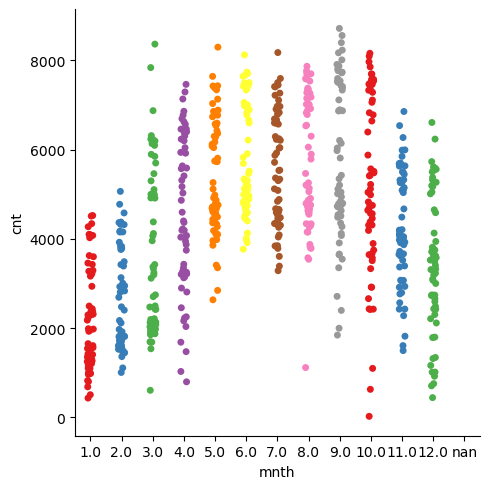

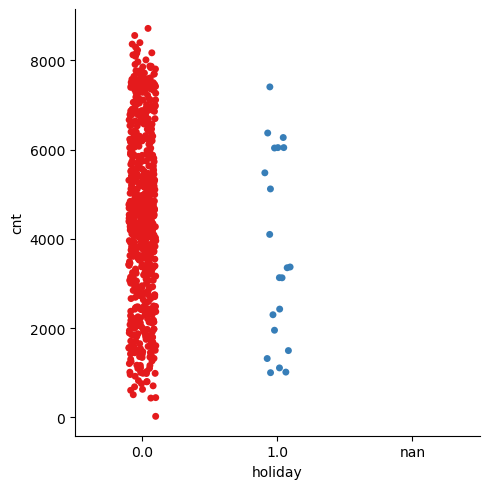

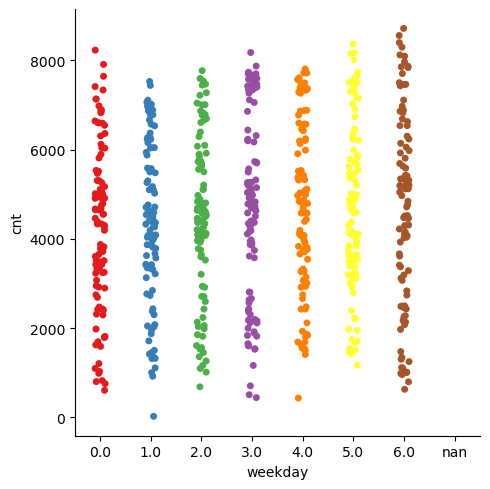

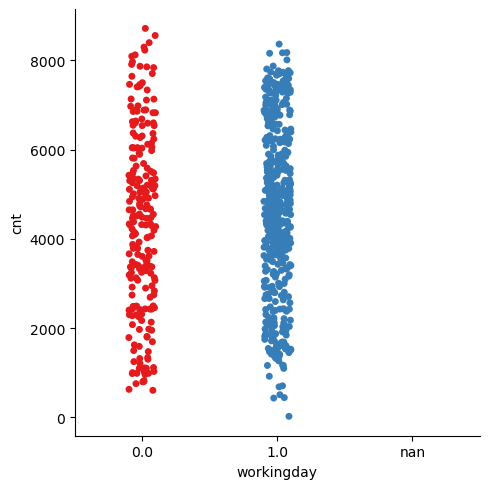

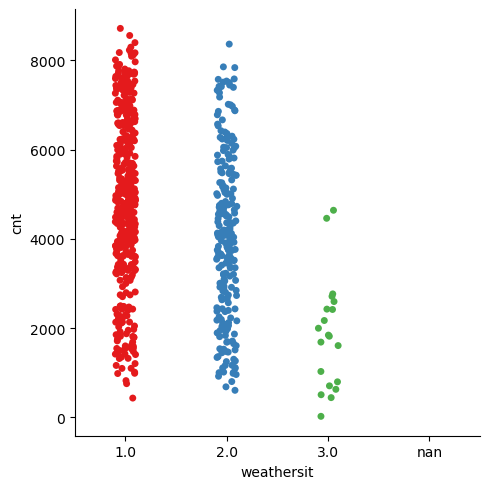

In [40]:
#Catplot of season agaisnt cnt
for i in categorical_col:
    sns.catplot(x=i, y="cnt", data=df1, hue=i, palette='Set1')


<h1 style="color:PaleVioletRed">Data Insights</h1>

* Seasons 2, 3, and 4 exhibit a significantly higher count of bikes on rent compared to Season 1.
* The bike rental count shows a notable increase from 2011 to 2012, suggesting a growth in bike rental demand over time.
* The month values between 3-10 has considerably a good count of bikes on rent
* Bike rental counts are lower on holidays compared to non-holiday days
* Bike rental counts are higher on weekdays compared to weekends, suggesting that bikes are frequently used for commuting or daily activities during weekdays.
* Bike rental counts are higher on working days compared to non-working days
* Clear weather (situation 1) has the highest bike rental counts.

<h1 style="color:PaleVioletRed">Model Creation</h1>



In [41]:
#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

The code splits the dataset into training and testing sets, with approximately 70% of the data used for training the model and 30% for evaluating its performance on unseen data.

In [42]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.iloc[:,0:-3],df1.iloc[:,-1],test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(511, 8) (220, 8) (511,) (220,)


In [43]:
numeric_col

['atemp', 'hum', 'windspeed']

In [44]:
categorical_col

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [45]:
print("Number of NaN values in X_train:", X_train.isnull().sum())
print("Number of NaN values in X_test:", X_test.isnull().sum())


Number of NaN values in X_train: season        9
yr            9
mnth          9
holiday       9
weekday       9
workingday    9
weathersit    9
atemp         9
dtype: int64
Number of NaN values in X_test: season        5
yr            5
mnth          5
holiday       5
weekday       5
workingday    5
weathersit    5
atemp         5
dtype: int64


In [46]:
from sklearn.impute import SimpleImputer
# Create a SimpleImputer object with strategy='mean' (you can also try 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


<h1 style="color:PaleVioletRed">Evaluating the Tuned Decision Tree Regressor</h1>


In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Build the Decision Tree Regressor with the best hyperparameters from GridSearchCV
best_model = DecisionTreeRegressor(max_depth=8, min_samples_split=4, random_state=42)

# Fit the Decision Tree model on the imputed training data
best_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data using the best model
y_pred_tuned = best_model.predict(X_test_imputed)

# Evaluate the performance of the tuned model with imputed data
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Model Mean Squared Error (MSE):", mse_tuned)
print("Tuned Model R-squared (R2):", r2_tuned)


Tuned Model Mean Squared Error (MSE): 892896.3604237589
Tuned Model R-squared (R2): 0.7755958851681141


<h1 style="color:PaleVioletRed">Data Insights</h1>

 *  The` Mean Squared Error (MSE)` of the model is approximately `892,896.36`, which represents the average squared difference between the predicted and actual bike rental counts.
 *  The `R-squared (R2)` value of the model is approximately `0.776`, indicating that around `77.56%` of the variance in the bike rental counts can be explained by the model's predictions.

<h1 style="color:PaleVioletRed">Hyperparameter Tuning using GridSearchCV for Decision Tree Regressor</h1>


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [ 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8],

}

# Create the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_imputed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions using the best model on the test data
y_pred_tuned = best_model.predict(X_test_imputed)

# Evaluate the performance of the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print("Tuned Model Mean Squared Error (MSE):", mse_tuned)



Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 2}
Tuned Model Mean Squared Error (MSE): 835565.6003211578


<h1 style="color:PaleVioletRed">Data Insights</h1>


* The best hyperparameters selected by GridSearchCV for the model are `'max_depth'`:` 6` and `'min_samples_split'`: `2`.
* The `Mean Squared Error (MSE)` of the tuned model is approximately `835,565.60`, which represents the average squared difference between the predicted and actual bike rental counts.

 <h1 style="color:PaleVioletRed">Model Evaluation</h1>

In [49]:
# Calculate R-squared (R2) on the test data
r2_tuned = r2_score(y_test, y_pred_tuned)
print("Tuned Model R-squared (R2):", r2_tuned)


Tuned Model R-squared (R2): 0.790004341786033


<h1 style="color:PaleVioletRed">Data Insights</h1>

   The tuned model's accuracy, represented by `R-squared (R2)`, is approximately `79%`. This means the model can explain about `79%` of the variations in the bike rental counts, indicating a good performance.

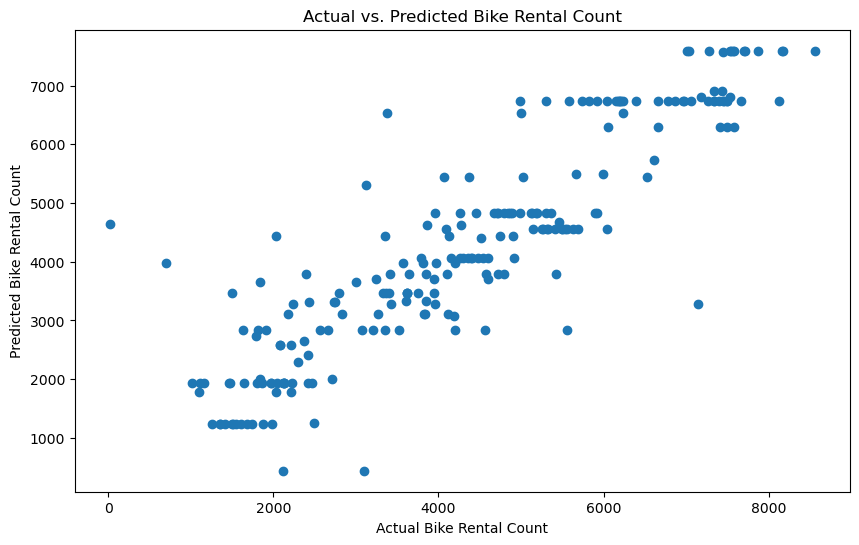

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned)
plt.xlabel('Actual Bike Rental Count')
plt.ylabel('Predicted Bike Rental Count')
plt.title('Actual vs. Predicted Bike Rental Count')
plt.show()


<h1 style="color:PaleVioletRed">Final Conclusion</h1>


<b> * Bike Rental Trends:</b> The bike rental demand showed a noticeable increase from `April` to `October 2012`, indicating strong demand during this period compared to the same period in 2011. This suggests positive growth in the bike rental business, reflecting an improved market performance.

<b>* Seasonal Pattern: </b>The bike rental count exhibits a clear seasonal pattern, with a peak demand from` April to October`, especially in `October`. This indicates a substantial demand for bike rentals during this period.

 <b>* Weekday Usage:</b> Bike rentals are consistently `higher on weekdays`, suggesting that people use bikes frequently for commuting or daily activities during the workweek.

<b> *  Weather Impact:</b> Clear weather conditions `(situation 1)` have the highest bike rental counts, while misty/cloudy weather (situation 2) has relatively lower counts. This suggests that people tend to rent bikes more on clear weather days.

<b>  *  Model Performance:</b> The tuned Decision Tree Regressor model achieved a `Mean Squared Error (MSE)` of approximately` 835,565.60` and an `R-squared (R2)` value of about` 79%.` The R2 value indicates that the model can explain around `79%` of the `variations` in the bike rental counts, suggesting a good performance.